# Assignment-18-Forecasting-Cocacola

In [1]:
# load libraries
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [5]:
# replace _ with space
df['Quarter'] = df['Quarter'].str.replace('_',' ')

In [6]:
#qs = df['Quarter'].str.replace(r'(Q\d) (\d+)', r'19\2-\1')
#df['date']= pd.PeriodIndex(qs, freq='Q').to_timestamp()

In [7]:
df['Quarter'] = pd.to_datetime(
    df['Quarter'].str.replace(r'(Q\d) (\d+)', r'19\2-\1'), errors='coerce')
df

,Quarter,Sales
0,1986-01-01,1734.827000
1,1986-04-01,2244.960999
2,1986-07-01,2533.804993
3,1986-10-01,2154.962997
4,1987-01-01,1547.818996
5,1987-04-01,2104.411995
6,1987-07-01,2014.362999
7,1987-10-01,1991.746998
8,1988-01-01,1869.049999
9,1988-04-01,2313.631996


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  42 non-null     datetime64[ns]
 1   Sales    42 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [10]:
# Extract Quarter
df['quarter'] = df['Quarter'].dt.strftime('%b')
# Extract Year
df['year'] = df['Quarter'].dt.strftime('%Y')

In [11]:
df.tail()

,Quarter,Sales,quarter,year
37,1995-04-01,4936.0,Apr,1995
38,1995-07-01,4895.0,Jul,1995
39,1995-10-01,4333.0,Oct,1995
40,1996-01-01,4194.0,Jan,1996
41,1996-04-01,5253.0,Apr,1996


<AxesSubplot:xlabel='quarter', ylabel='year'>

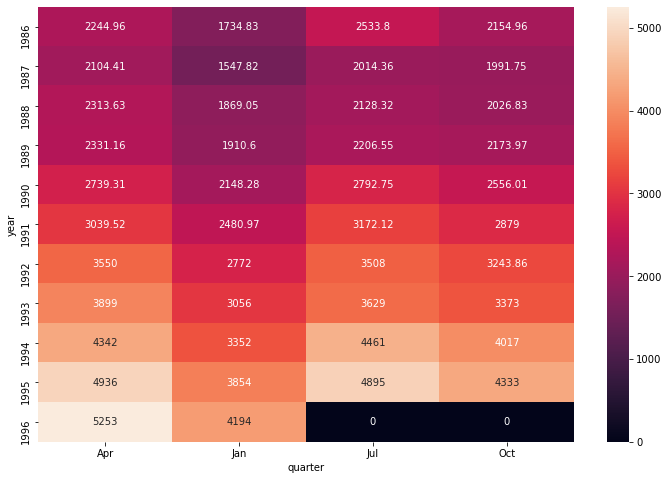

In [12]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

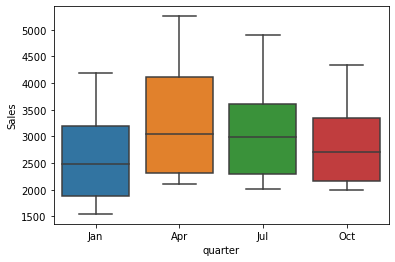

In [13]:
# Boxplots
sns.boxplot(x="quarter",y="Sales",data=df)

<AxesSubplot:xlabel='year', ylabel='Sales'>

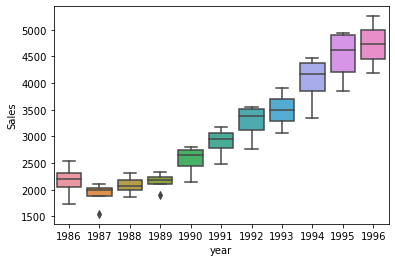

In [14]:
sns.boxplot(x="year",y="Sales",data=df)

<AxesSubplot:xlabel='year', ylabel='Sales'>

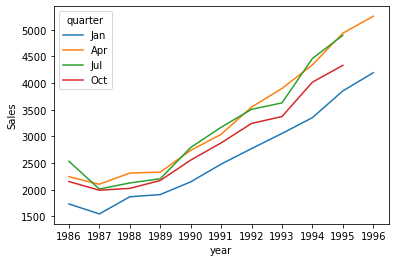

In [15]:
sns.lineplot(x='year',y='Sales',hue='quarter',data=df)

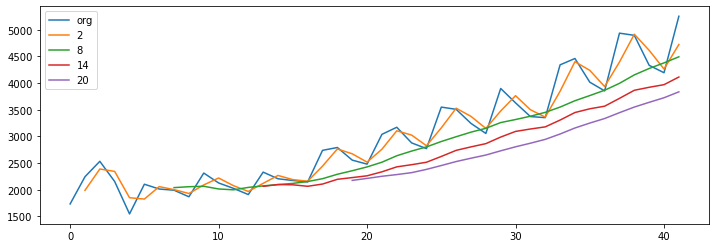

In [16]:
# Moving Average
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,24,6):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

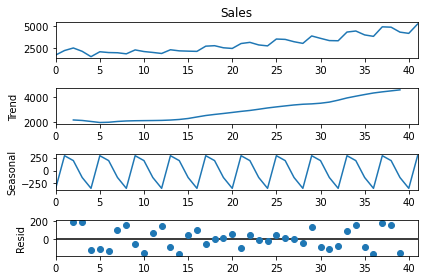

In [17]:
# Time series decomposition plot
decompose_result = seasonal_decompose(df.Sales,period=4)
decompose_result.plot()
plt.show()

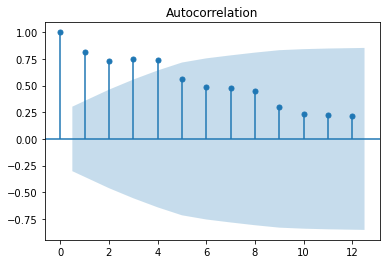

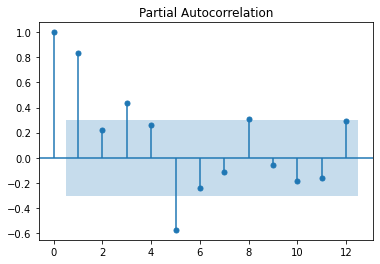

In [18]:
# ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

In [19]:
df["t"] = np.arange(1,len(df)+1)
df["t_squared"] = df["t"]*df["t"]
df["log_Sales"] = np.log(df["Sales"])

In [20]:
df['year'] = df['year'].astype(int)

In [21]:
#one hot encoding
ohe = ce.OneHotEncoder(cols=['quarter'])
df=ohe.fit_transform(df)
df

,Quarter,Sales,quarter_1,quarter_2,quarter_3,quarter_4,year,t,t_squared,log_Sales
0,1986-01-01,1734.827000,1,0,0,0,1986,1,1,7.458663
1,1986-04-01,2244.960999,0,1,0,0,1986,2,4,7.716443
2,1986-07-01,2533.804993,0,0,1,0,1986,3,9,7.837477
3,1986-10-01,2154.962997,0,0,0,1,1986,4,16,7.675529
4,1987-01-01,1547.818996,1,0,0,0,1987,5,25,7.344602
5,1987-04-01,2104.411995,0,1,0,0,1987,6,36,7.651791
6,1987-07-01,2014.362999,0,0,1,0,1987,7,49,7.608058
7,1987-10-01,1991.746998,0,0,0,1,1987,8,64,7.596767
8,1988-01-01,1869.049999,1,0,0,0,1988,9,81,7.533186
9,1988-04-01,2313.631996,0,1,0,0,1988,10,100,7.746574


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Quarter    42 non-null     datetime64[ns]
 1   Sales      42 non-null     float64       
 2   quarter_1  42 non-null     int64         
 3   quarter_2  42 non-null     int64         
 4   quarter_3  42 non-null     int64         
 5   quarter_4  42 non-null     int64         
 6   year       42 non-null     int64         
 7   t          42 non-null     int64         
 8   t_squared  42 non-null     int64         
 9   log_Sales  42 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 3.4 KB


### Split Dataset in train and test

In [23]:
train = df.iloc[:int(df.shape[0]*0.80)]
test = df.iloc[int(df.shape[0]*0.80):]

### Linear Model

In [24]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = mean_squared_error(pred_linear,test.Sales,squared=False)
rmse_linear

811.0635934509903

### Exponential

In [25]:
Exp = smf.ols('log_Sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = mean_squared_error(pred_linear,test.Sales,squared=False)
rmse_Exp

811.0635934509903

### Quadratic

In [26]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = mean_squared_error(pred_Quad,test.Sales,squared=False)
rmse_Quad

423.10057375272254

### Additive seasonality

In [27]:
add_sea = smf.ols('Sales~quarter_1+quarter_2+quarter_3+quarter_4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['quarter_1','quarter_2','quarter_3','quarter_4']]))
rmse_add_sea = mean_squared_error(pred_add_sea,test.Sales,squared=False)
rmse_add_sea

1884.9697647455082

### Additive Seasonality Quadratic

In [28]:
add_sea_Quad = smf.ols('Sales~t+t_squared+quarter_1+quarter_2+quarter_3+quarter_4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['quarter_1','quarter_2','quarter_3','quarter_4','t','t_squared']]))
rmse_add_sea_quad = mean_squared_error(pred_add_sea,test.Sales,squared=False)
rmse_add_sea_quad

1884.9697647455082

### Multiplicative Seasonality

In [29]:
Mul_sea = smf.ols('log_Sales~quarter_1+quarter_2+quarter_3+quarter_4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = mean_squared_error(pred_Mult_sea,test.Sales,squared=False)
rmse_Mult_sea

4489.4311963881755

### Multiplicative Additive Seasonality

In [30]:
Mul_Add_sea = smf.ols('log_Sales~t+quarter_1+quarter_2+quarter_3+quarter_4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = mean_squared_error(pred_Mult_add_sea,test.Sales,squared=False)
rmse_Mult_add_sea 

4488.970056804817

### Simple Exponential Method

In [31]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_ses = mean_squared_error(pred_ses,test.Sales,squared=False)
rmse_ses

1229.521094631438

### Holt method

In [32]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse_hw = mean_squared_error(pred_hw,test.Sales,squared=False)
rmse_hw

1135.3462068267984

### Holts winter exponential smoothing with additive seasonality and additive trend

In [33]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_add = mean_squared_error(pred_hwe_add_add,test.Sales,squared=False)
rmse_hwe_add_add

524.7993518197693

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [34]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_mul_add = mean_squared_error(pred_hwe_mul_add,test.Sales,squared=False)
rmse_hwe_mul_add

350.75451421944683

### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [35]:
hwe_model_mul_mul = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_mul_mul = mean_squared_error(pred_hwe_mul_mul,test.Sales,squared=False)
rmse_hwe_mul_mul

286.08697484507235

In [36]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear",
                           "rmse_Exp",
                           "rmse_Quad",
                           "rmse_add_sea",
                           "rmse_add_sea_quad",
                           "rmse_Mult_sea",
                           "rmse_Mult_add_sea",
                           "rmse_ses",
                           "rmse_hw",
                           "rmse_hwe_add_add",
                           "rmse_hwe_mul_add",
                           "rmse_hwe_mul_mul"]),
        "RMSE_Values":pd.Series([rmse_linear,
                                 rmse_Exp,
                                 rmse_Quad,
                                 rmse_add_sea,
                                 rmse_add_sea_quad,
                                 rmse_Mult_sea,
                                 rmse_Mult_add_sea,
                                 rmse_ses,
                                 rmse_hw,
                                 rmse_hwe_add_add,
                                 rmse_hwe_mul_add,
                                 rmse_hwe_mul_mul])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
11,rmse_hwe_mul_mul,286.086975
10,rmse_hwe_mul_add,350.754514
2,rmse_Quad,423.100574
9,rmse_hwe_add_add,524.799352
0,rmse_linear,811.063593
1,rmse_Exp,811.063593
8,rmse_hw,1135.346207
7,rmse_ses,1229.521095
3,rmse_add_sea,1884.969765
4,rmse_add_sea_quad,1884.969765


### Final Model by combining train and test

In [37]:
hwe_model_mul_mul = ExponentialSmoothing(df["Sales"],seasonal="mul",trend="mul",seasonal_periods=12).fit()

In [38]:
#Forecasting for next 10 time periods
hwe_model_mul_mul.forecast(10)

42    4961.652740
43    4645.977071
44    4610.834201
45    5883.749554
46    5972.711571
47    5373.638848
48    5137.019702
49    6500.464013
50    6382.398970
51    5765.564396
dtype: float64